In [5]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


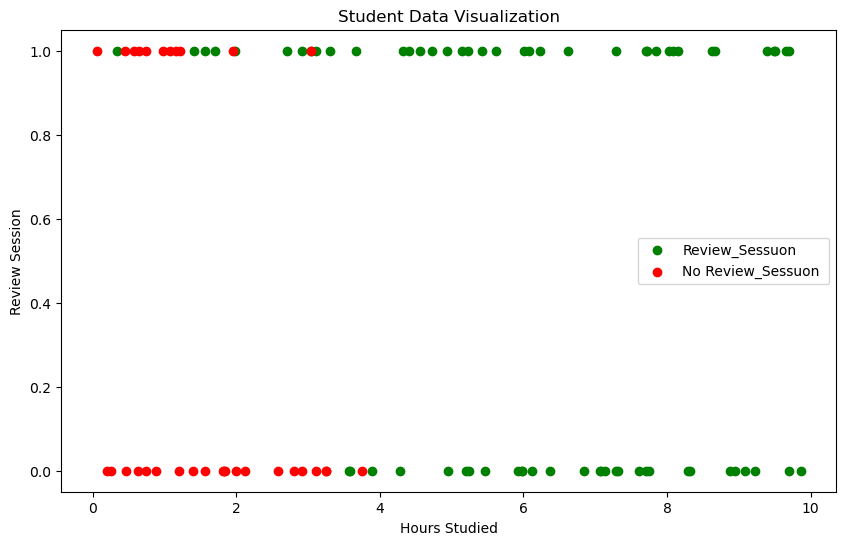

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is in a file named "student_data.csv"
data = pd.read_csv("C:/Users/savar/Downloads/student_data.csv")

# Extract the columns
hours_studied = data['Hours_Studied']
review_session = data['Review_Session']
results = data['Results']

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied[results == 1], review_session[results == 1], c='green', label='Review_Sessuon')
plt.scatter(hours_studied[results == 0], review_session[results == 0], c='red', label='No Review_Sessuon ')

# Customize the plot
plt.title('Student Data Visualization')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.legend(loc='best')

# Show the plot
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Assuming the dataset is in a file named "student_data.csv"
data = pd.read_csv("C:/Users/savar/Downloads/student_data.csv")

# Extract the features (X) and the target variable (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
y_pred = model.predict(X_test)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.85
Confusion Matrix:
 [[ 5  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("C:/Users/savar/Downloads/student_data.csv")

# Split the dataset into features (X) and target (y)
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 85.00%
Confusion Matrix:
 [[ 5  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [8]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.85
AUC: 0.9642857142857144


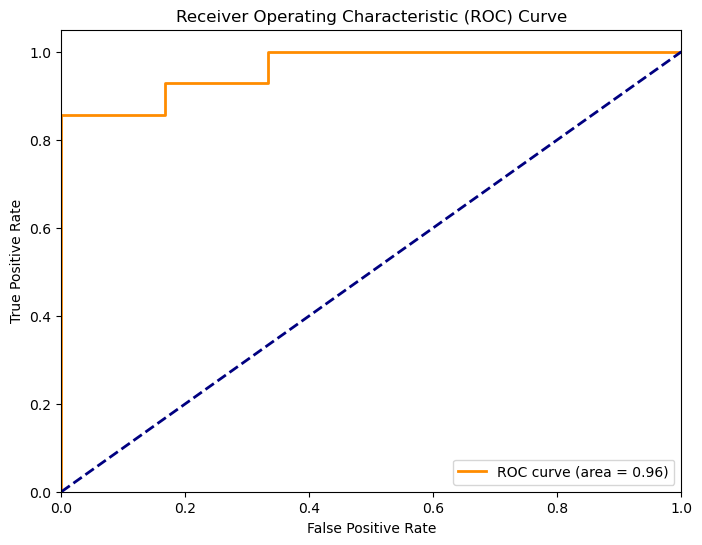

Confusion Matrix:
 [[ 5  1]
 [ 2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

Model Coefficients:
Hours_Studied: 1.4036559921697427
Review_Session: 1.4284681551316423
Intercept: -4.581361227356291


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/savar/Downloads/student_data.csv")
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC:", roc_auc)

# Generate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

# Print model coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients[0]):
    print(f"{feature}: {coef}")
print("Intercept:", intercept[0])


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("C:/Users/savar/Downloads/student_data.csv")
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Support Vector Machine model with a linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = model_linear.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

# Print confusion matrix and classification report
confusion_linear = confusion_matrix(y_test, y_pred_linear)
classification_rep_linear = classification_report(y_test, y_pred_linear)

print("Confusion Matrix (Linear Kernel):\n", confusion_linear)
print("Classification Report (Linear Kernel):\n", classification_rep_linear)


Accuracy (Linear Kernel): 0.85
Confusion Matrix (Linear Kernel):
 [[ 5  1]
 [ 2 12]]
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [3]:
# Create and fit a Support Vector Machine model with an RBF kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = model_rbf.predict(X_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)

# Print confusion matrix and classification report
confusion_rbf = confusion_matrix(y_test, y_pred_rbf)
classification_rep_rbf = classification_report(y_test, y_pred_rbf)

print("Confusion Matrix (RBF Kernel):\n", confusion_rbf)
print("Classification Report (RBF Kernel):\n", classification_rep_rbf)


Accuracy (RBF Kernel): 0.85
Confusion Matrix (RBF Kernel):
 [[ 5  1]
 [ 2 12]]
Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("C:/Users/savar/Downloads/student_data.csv")
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with an RBF kernel
model_rbf = SVC(kernel='rbf')

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],       # Regularization parameter
    'gamma': [0.1, 1, 10],   # Kernel coefficient for 'rbf' kernel
}

# Create the GridSearchCV object with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(model_rbf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_rbf = best_model.predict(X_test)

# Print classification report for the best model
classification_rep_rbf = classification_report(y_test, y_pred_rbf)
print("Classification Report (Best Model - RBF Kernel):\n", classification_rep_rbf)


Best Hyperparameters: {'C': 1, 'gamma': 1}
Classification Report (Best Model - RBF Kernel):
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20

